In [32]:
import tensorflow as tf
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical


In [33]:
data=tf.keras.datasets.mnist
(x_train,y_train), (x_test, y_test)= data.load_data()

In [34]:
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [35]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

In [38]:
y_train[3]

1

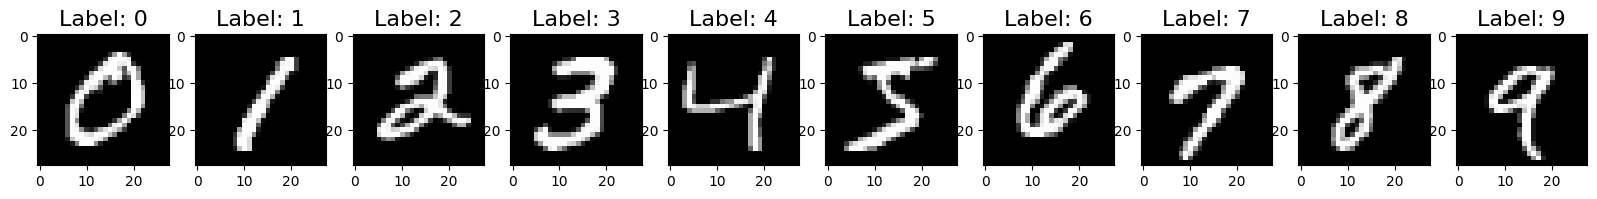

In [36]:
num_classes = 10
f, ax = plt.subplots(1, num_classes, figsize=(20,20))

for i in range(0, num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample, cmap='gray')
  ax[i].set_title("Label: {}".format(i), fontsize=16)

In [39]:
y_train = to_categorical(y_train)
y_train.shape

(60000, 10)

In [40]:
y_train[3]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.])

In [45]:
model= tf.keras.models.Sequential([
  tf.keras.layers.Dense(128,activation='relu'),
  tf.keras.layers.Flatten(input_shape=(28, 128)),
  tf.keras.layers.Dense(32,activation='softplus'),
  tf.keras.layers.Dense(10,activation='softmax')
])
model.compile(optimizer='adam', loss='BinaryCrossentropy', metrics=['accuracy'])

In [46]:
model.fit(x_train, y_train, epochs=5, batch_size=32)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 7ms/step - accuracy: 0.7445 - loss: 0.6272
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9358 - loss: 0.0545
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.9480 - loss: 0.0402
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9564 - loss: 0.0324
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9633 - loss: 0.0271


In [50]:
y_test = to_categorical(y_test)
model.evaluate(x_test,y_test, batch_size=32)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9401 - loss: 0.0408


[0.035547006875276566, 0.9506000280380249]